*Debussy_Mozart_Model.ipynb* <p style='text-align: right;'> <b> September 20th 2020 </b> </p>
<p style='text-align: right;'> <b> David Diston </b> </p>

# Build an LSTM RNN to Classify Music by Debussy and Mozart

***Once again, trial-and-error tuning was performed when developing this model. The final model iteration is shown here***

Here I will build an LSTM RNN that will attempt to classify music as either having been composed by Debussy (1862-1918) and Mozart (1756-1791). Both of these composers are from different compositional epochs, and of different nationalities (Debussy-French, Mozart-Austrian). Since they compose in a very different style, I hypothesise that this model will have an easier time classifying compared to my other models.

As with the data preprocessing notebook, this model notebook follows the same structure as the last model notebook. Therefore, the explainatory commenting will be lower in quantity and focus on differences between these notebooks. If further clarification is required please refer to the `11-RNN_Model_Composers.ipynb` notebook.

In [1]:
import numpy as np
import os
import tensorflow
import random

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
def training_set(cat, datdir):
    for category in cat:
        path = os.path.join(datdir, category)
        class_num = categories.index(category)
        for array in os.listdir(path):
            try:
                midi_array = np.load(os.path.join(path, array))
                training_data.append([midi_array, class_num])
            except Exception as e:
                pass

In [3]:
# Load Training Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Data'
categories = ['Debussy', 'Mozart']

training_data = []

training_set(categories, datadirectory)

random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [4]:
# Load Test Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Validation_Set_Data'
categories = ['Debussy', 'Mozart']
    
training_data = []
    
training_set(categories, datadirectory)

random.shuffle(training_data)

X_val = []
y_val = []

for features, label in training_data:
    X_val.append(features)
    y_val.append(label)

In [5]:
# Convert to array and transform
X_train = np.array(X).reshape(-1, 200, 88)
y_train = np.array(y)
X_val = np.array(X_val).reshape(-1, 200, 88)
y_val = np.array(y_val)

# Normalize
X_train = X_train / 127
X_val = X_val / 127

In [9]:
# Instantiate the model
Debussy_Mozart_model = Sequential()

Debussy_Mozart_model.add(LSTM(44, input_shape = (X_train.shape[1:]), activation = 'relu', return_sequences = True))
Debussy_Mozart_model.add(Dropout(0.1))

Debussy_Mozart_model.add(LSTM(44, activation='relu'))
Debussy_Mozart_model.add(Dropout(0.1))

Debussy_Mozart_model.add(Dense(1408, activation='relu'))
Debussy_Mozart_model.add(Dropout(0.1))

Debussy_Mozart_model.add(Dense(2, activation='sigmoid'))

In [10]:
# Define optimizer
opt = Adam(lr = 0.0001, decay = 0.00001, clipvalue=0.5)

# Compile model
Debussy_Mozart_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = opt,
    metrics=['accuracy'])

Debussy_Mozart_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 200, 44)           23408     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 44)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 44)                15664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 44)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1408)              63360     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [11]:
# Create checkpoint to record best weights
checkpoint = ModelCheckpoint('Models/Debussy_Mozart_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
Debussy_Mozart_model.fit(X_train, y_train,
               batch_size = 10,
               epochs = 15,
               validation_data=(X_val, y_val),
               callbacks=callbacks_list)

Epoch 1/15
200/200 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5325
Epoch 00001: val_accuracy improved from -inf to 0.62500, saving model to Models/Debussy_Mozart_model.hdf5
200/200 [==============================] - 10s 50ms/step - loss: 0.6924 - accuracy: 0.5325 - val_loss: 0.6893 - val_accuracy: 0.6250
Epoch 2/15
199/200 [============================>.] - ETA: 0s - loss: 0.6851 - accuracy: 0.7191
Epoch 00002: val_accuracy improved from 0.62500 to 0.86500, saving model to Models/Debussy_Mozart_model.hdf5
200/200 [==============================] - 10s 49ms/step - loss: 0.6987 - accuracy: 0.7190 - val_loss: 1.2324 - val_accuracy: 0.8650
Epoch 3/15
200/200 [==============================] - ETA: 0s - loss: 1.8696 - accuracy: 0.7870
Epoch 00003: val_accuracy improved from 0.86500 to 0.88000, saving model to Models/Debussy_Mozart_model.hdf5
200/200 [==============================] - 10s 49ms/step - loss: 1.8696 - accuracy: 0.7870 - val_loss: 0.5891 - val_accura

In [12]:
# Save the model
Debussy_Mozart_model.save('Models/Debussy_Mozart_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Models/Debussy_Mozart_model\assets


### Model Evaluation

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [14]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [15]:
# Load Test Data
datadirectory = 'C:/Users/David Diston/Documents/CapstonePythonScripts/2Comp/2Comp_Test_Set_Data'
categories = ['Debussy', 'Mozart']
    
training_data = []
    
training_set(categories, datadirectory)

random.shuffle(training_data)

X_test = []
y_test = []

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, 200, 88)
y_test = np.array(y_test)

# Normalization
X_test = X_test / 127

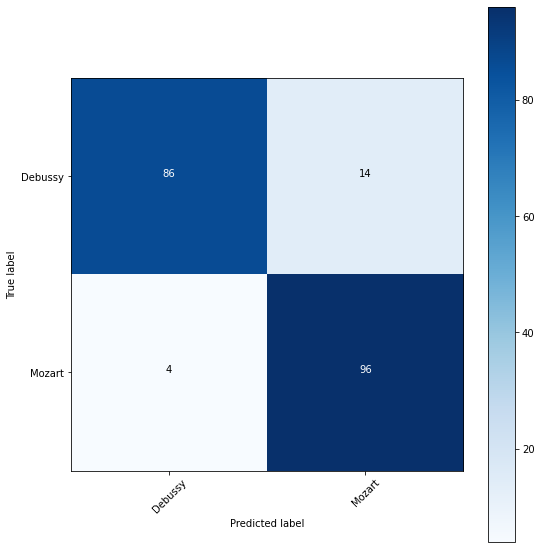

In [16]:
# Find test predictions
results = Debussy_Mozart_model.predict(X_test, batch_size = 10)

# Convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = ['Debussy', 'Mozart']

# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

In [17]:
# Print Classification report
CR = classification_report(y_test, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       100
           1       0.87      0.96      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



As expected, the classification accuracy of this model is quite high. As the compositional styles of Debussy and Mozart are quite different it makes sense that the model would have a comparatively easy time classifying between the two.

The observation that the model miss-classified Debussy more often than Mozart is interesting. Based on the findings from my other models, and my own musical background, I would hazard the guess that this is because Mozarts compositional style is more rigid and formulaic, while Debussy composes in a much more liberal late Romantic style, even encorporating elements of early modernism in his music. Overall with 90% validation accuracy and 91% test accuracy, I would absolutely classify this model a success, and conclude that my earlier hypothesis stating that composers of different epochs and nationalities are easier to classify is correct. This will be made even more clear by observing the Prokofiev-Rachmaninoff classification model.